In [1]:
import numpy as np
import gensim

%matplotlib notebook
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

In [2]:
def open_pickle(path):
    import pickle
    with open(path, 'rb') as f:
        X = pickle.load(f)
    return X

In [3]:
X_train_sequence = open_pickle('../../data/imdb/X_tr_sample_original.pkl')
X_test_sequence = open_pickle('../../data/imdb/X_te_sample_original.pkl')
y_train_target = open_pickle('../../data/imdb/y_tr_target_original.pkl')
y_test_target = open_pickle('../../data/imdb/y_te_target_original.pkl')

In [4]:
X_train_sequence[0]

'even kind of a happy ending of sort whee a step up from part 4 but not much of one again brian yuzna is involved and screaming mad george so some decent special effect but not enough to make this great a few leftover from part 4 are hanging around too like clint howard and neith hunter but that does not really make any difference anyway i now have seeing the whole series out of my system now if i could'

In [5]:
train_sequence = list()
for sample in X_train_sequence:
    train_sequence.append(sample.split())

In [8]:
model = gensim.models.Word2Vec(train_sequence,
                              size=100,
                              window=5,
                              min_count=1,
                              workers=2,
                              sg=0)             # 0 -> CBOW, 1->skip-gram
# CBOW -> predict the middle word

KeyboardInterrupt: 

In [7]:
words = list(model.wv.vocab)

In [53]:
len(words)

174

In [54]:
X = model[model.wv.vocab]

/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### Visualize word2vec embedding

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

<IPython.core.display.Javascript object>


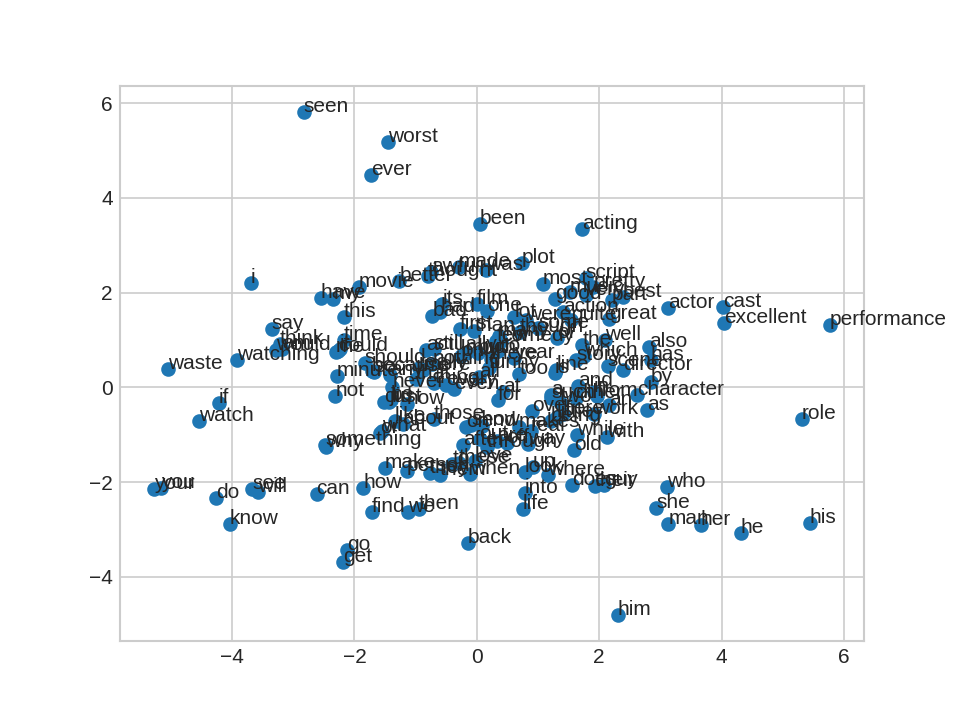

In [58]:
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
#     if model.wv.vocab[word].count < 5000:
#         continue
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    
plt.show()